In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/Tesla.csv')
df.head()



,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [ ]:
df.shape


(2416, 7)

In [ ]:
df.describe()


,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


In [ ]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
df[df['Close'] == df['Adj Close']].shape


(2416, 7)

In [ ]:
df = df.drop(['Adj Close'], axis=1)


In [ ]:
df.isnull().sum()


Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

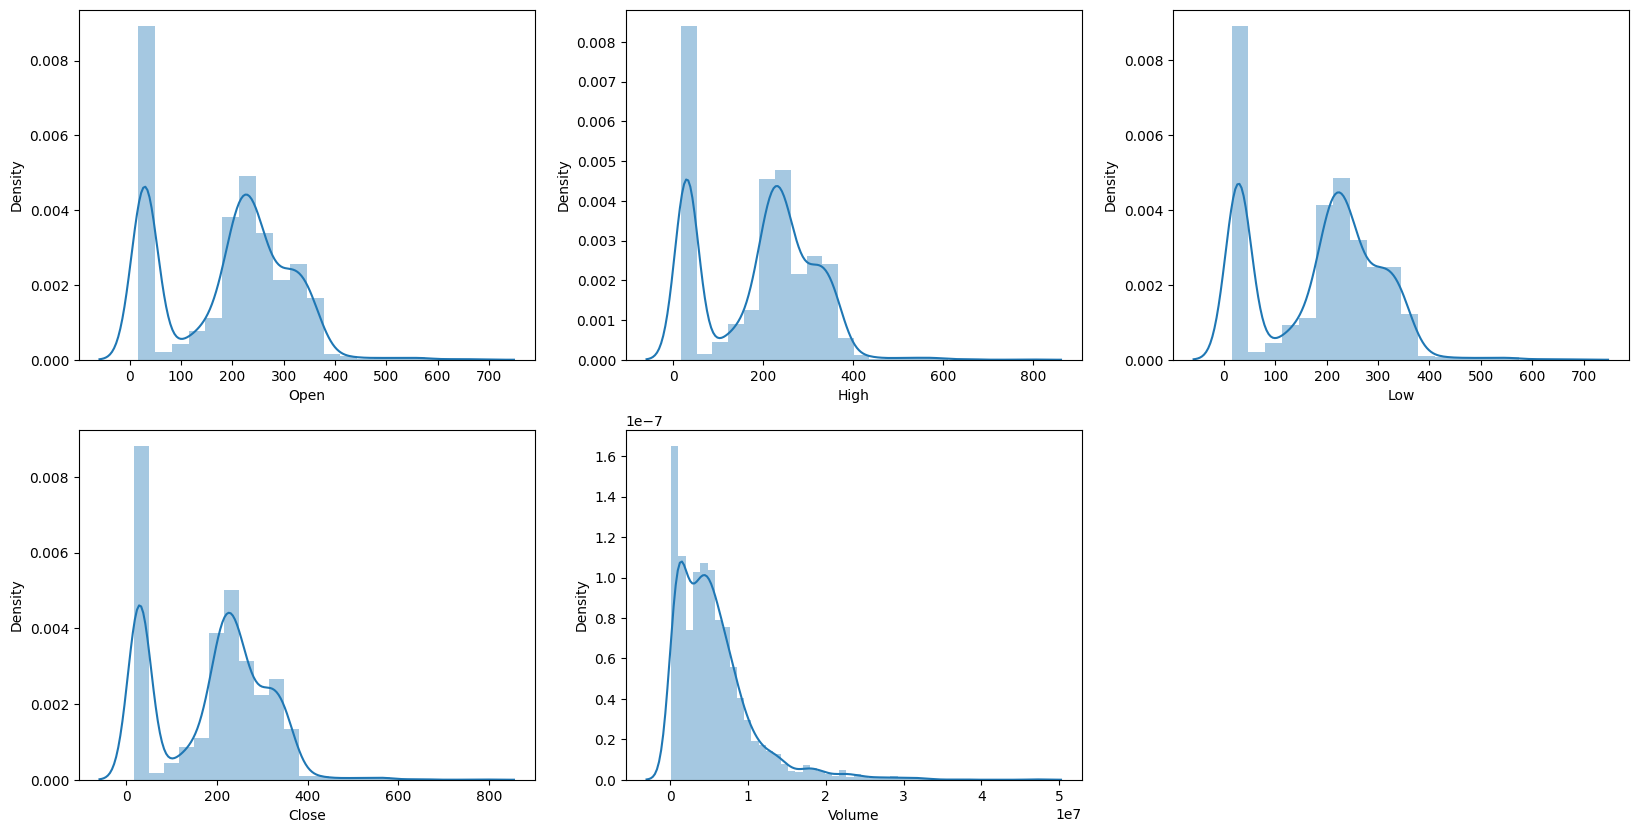

In [ ]:
#EDA
features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.distplot(df[col])
plt.show()


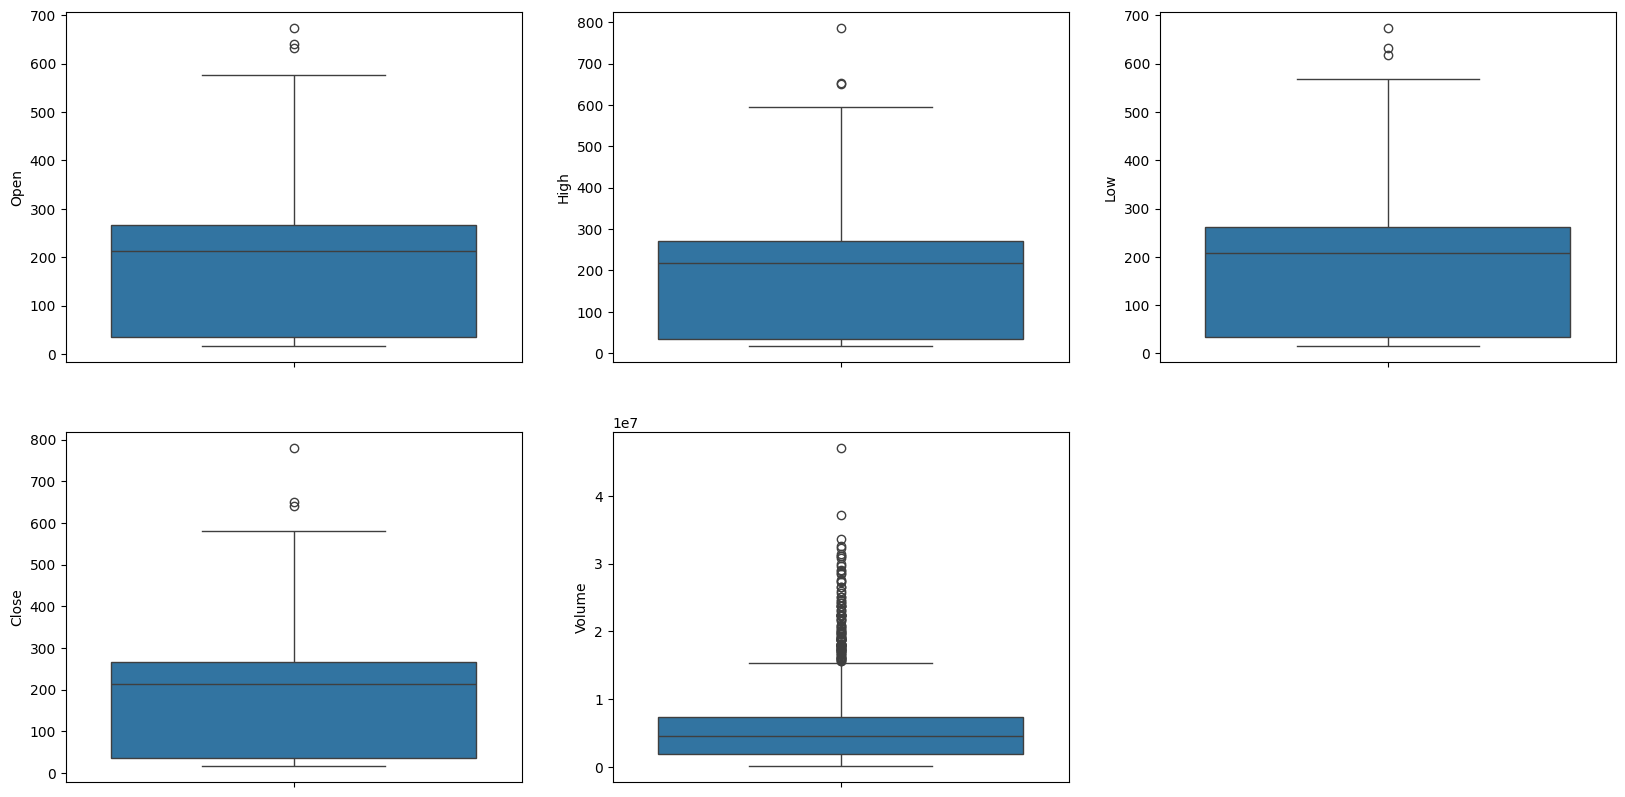

In [ ]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
   plt.subplot(2,3,i+1)
   sb.boxplot(df[col])
plt.show()


In [ ]:
splitted = df['Date'].str.split('-', expand=True)

# Assigning and converting to integer
df['year'] = splitted[0].astype(int)
df['month'] = splitted[1].astype(int)
df['day'] = splitted[2].astype(int)
df.head()


,Date,Open,High,Low,Close,Volume,year,month,day
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,2010,6,29
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,2010,6,30
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,2010,7,1
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,2010,7,2
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,2010,7,6


In [ ]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()


,Date,Open,High,Low,Close,Volume,year,month,day,is_quarter_end
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,2010,6,29,1
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,2010,6,30,1
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,2010,7,1,0
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,2010,7,2,0
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,2010,7,6,0


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])


result = df.groupby('is_quarter_end').mean()

# Display the result
print(result)


                                        Date        Open        High  \
is_quarter_end                                                         
0              2015-04-15 12:01:46.930693120  185.875081  189.254226   
1              2015-04-15 09:25:12.000000000  187.071200  190.232700   

                       Low       Close        Volume         year     month  \
is_quarter_end                                                                
0               182.449499  186.085081  5.767062e+06  2014.816213  6.173886   
1               183.860262  187.047163  5.180154e+06  2014.697500  7.597500   

                      day  
is_quarter_end             
0               15.710396  
1               15.825000  


In [ ]:
df['open-close'] = df['Open'] - df['Close']
df['low-high'] = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)


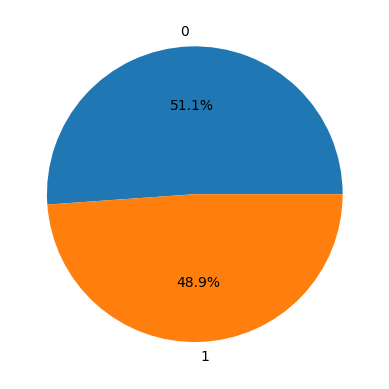

In [ ]:
plt.pie(df['target'].value_counts().values,
		labels=[0, 1], autopct='%1.1f%%')
plt.show()


In [ ]:
#Data Splitting

features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
	features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)


(2174, 3) (242, 3)


In [ ]:
#Model Development

models = [LogisticRegression(), SVC(
kernel='poly', probability=True), XGBClassifier()]

for i in range(3):
  models[i].fit(X_train, Y_train)

  print(f'{models[i]} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(
   	Y_train, models[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy : ', metrics.roc_auc_score(
	  Y_valid, models[i].predict_proba(X_valid)[:,1]))
  print()


LogisticRegression() : 
Training Accuracy :  0.5228802330060918
Validation Accuracy :  0.4923371647509579

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.5294530029591435
Validation Accuracy :  0.4625068418171866

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training 

In [ ]:
print(  models[i].predict_proba(X_valid)[:,1])

[0.61139053 0.62468386 0.71259445 0.6718092  0.14430392 0.3083938
 0.57152146 0.54366595 0.4907119  0.60038424 0.49634603 0.78536844
 0.16855799 0.5627636  0.37815854 0.6278398  0.18244372 0.4940888
 0.60594076 0.46997425 0.30720365 0.5593085  0.68260825 0.55347526
 0.43411604 0.42116037 0.8712862  0.58438027 0.65730375 0.7742042
 0.46713662 0.45411882 0.7565232  0.7589303  0.38051084 0.1784981
 0.6734496  0.6713937  0.35322198 0.4858465  0.54072505 0.40118897
 0.50255996 0.8381426  0.676338   0.66361725 0.4582522  0.91312855
 0.6390622  0.6259817  0.35526258 0.4297537  0.35363838 0.2437363
 0.3579676  0.26391527 0.6457864  0.48293844 0.44388884 0.84921414
 0.13631037 0.721151   0.36464006 0.70368487 0.48762935 0.43946305
 0.5618118  0.18812415 0.695946   0.25832838 0.7505347  0.43169895
 0.7237377  0.65131193 0.40502802 0.692481   0.22417754 0.7144359
 0.41189927 0.4885644  0.22991782 0.08942004 0.59284306 0.46558082
 0.5515014  0.5823588  0.4356905  0.6181775  0.39541057 0.11206164
 

In [ ]:
print(Y_valid)

1683    0
904     0
2184    0
1878    0
1080    1
       ..
1670    0
1806    1
2005    1
2289    0
49      0
Name: target, Length: 242, dtype: int64


In [ ]:
#dont buy-0
#buy -1
for i in range(3):
  print(models[i].predict(X_valid))

[1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1
 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 0 0 1
 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 0 1 0 1 0 0 1
 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1]
[1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 0 0 1 1